<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/%E6%B1%BA%E5%AE%9A%E6%9C%A8%26%E5%9F%BA%E6%9C%AC%E7%9A%84%E3%81%AA%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
#データセットをロード
iris = datasets.load_iris()
#3，4行目の特徴量を抽出
X = iris.data[:, [2, 3]]
#クラスラベルを取得
y = iris.target
#一意なクラスラベルを出力
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
#訓練データとテストデータに分割
#全体の30％をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #グリットポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリットポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリットポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #クラスごとにデータ点をプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # テストデータを目立たせる
    if test_idx:
        # 全てのデータ点をプロット
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

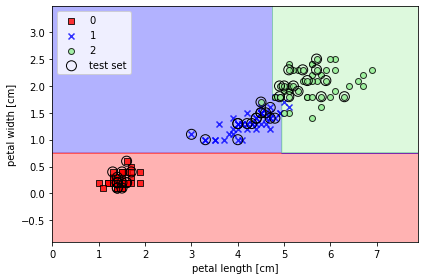

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

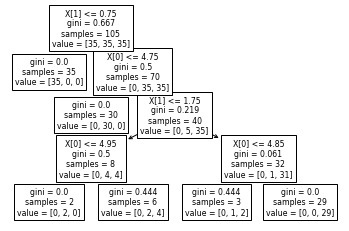

In [ ]:
from sklearn import tree
tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.219\nsamples = 40\nvalue = [0, 5, 35]')]

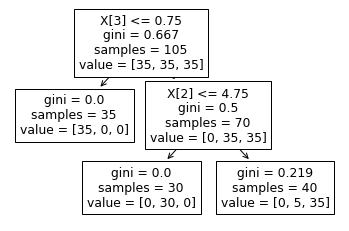

In [ ]:
tree.plot_tree(clf)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

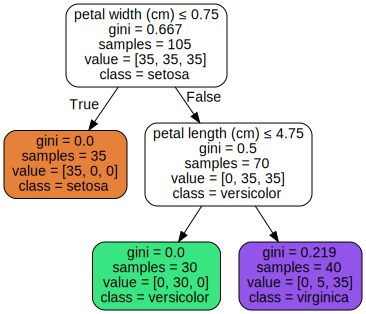

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
print("train_accuracy{:3f}".format(clf.score(X_train,y_train)))
print("test_accuracy{:3f}".format(clf.score(X_test,y_test)))

train_accuracy0.952381
test_accuracy0.955556


In [ ]:
print("Feature names:\n{}".format(iris.feature_names))
print("Feature importances:\n{}".format(clf.feature_importances_))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importances:
[0.         0.         0.42857143 0.57142857]


In [ ]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

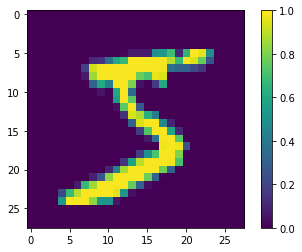

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

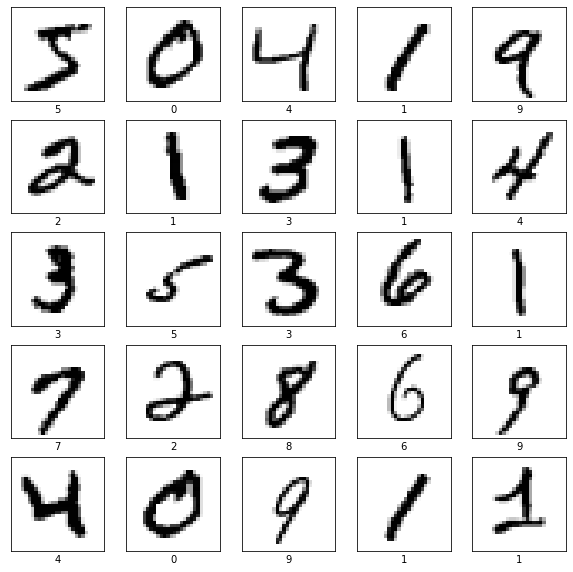

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1716 - accuracy: 0.7246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4846 - accuracy: 0.8741
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3825 - accuracy: 0.8955
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3409 - accuracy: 0.9040
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3176 - accuracy: 0.9097


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2993 - accuracy: 0.9140 - 538ms/epoch - 2ms/step

Test accuracy: 0.9139999747276306


In [ ]:
predictions = model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

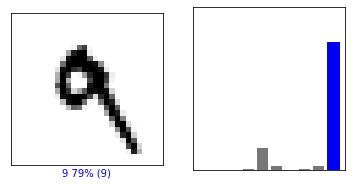

In [ ]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()